In [47]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# Application of genome-scale metabolic models

## Model import

As you've already encountered in previous exercises, you can download a GSM using `cobra.io.read_sbml_model`. Let's load the latest iteration of the *Escherchia coli* GSM iML1515 ([nature.com/articles/nbt.3956](https://www.nature.com/articles/nbt.3956)).

In [48]:
from cobra.io import read_sbml_model
model = read_sbml_model('../../data/iML1515.xml')

## Model content

### Metabolites

The model contains a list of metabolites. Here are the first ten.

In [49]:
model.metabolites[0:10]

[<Metabolite octapb_c at 0x20c37c55190>,
 <Metabolite cysi__L_e at 0x20c37c55160>,
 <Metabolite dhap_c at 0x20c37c551f0>,
 <Metabolite prbatp_c at 0x20c37c552e0>,
 <Metabolite 10fthf_c at 0x20c37c553d0>,
 <Metabolite btal_c at 0x20c37c55340>,
 <Metabolite 6pgg_c at 0x20c37c554c0>,
 <Metabolite co2_e at 0x20c37c55310>,
 <Metabolite akg_e at 0x20c37c55550>,
 <Metabolite gsn_e at 0x20c37c555b0>]

There are 1877 metabolites in the model.

In [50]:
len(model.metabolites)

1877

One can access a specific metabolite using dot notation.

In [51]:
model.metabolites.g3p_c

Metabolite identifier,g3p_c
Name,Glyceraldehyde 3-phosphate
Memory address,0x020c38c5b850
Formula,C3H5O6P
Compartment,c
In 15 reaction(s),"DRPA, DXPS, DDPGALA, TKT2, GAPP, FBA, TKT1, TALA, TRPS3, F6PA, TRPS1, GAPD, TGBPA, TPI, EDA"


<div class="alert alert-warning">

**Warning:** One cannot use dot notation to access metabolites, reactions, or genes if their identifiers do not resemble proper Python variable names.

</div>

In [52]:
# model.metabolites.10fthf_c  # this won't work, you can try by uncommenting the line

<div class="alert alert-success">

**Solution:** Use the method `get_by_id` instead!

</div>

In [53]:
model.metabolites.get_by_id('10fthf_c')

Metabolite identifier,10fthf_c
Name,10-Formyltetrahydrofolate
Memory address,0x020c37c553d0
Formula,C20H21N7O7
Compartment,c
In 8 reaction(s),"FTHFLi, FTHFD, BIOMASS_Ec_iML1515_core_75p37M, BIOMASS_Ec_iML1515_WT_75p37M, ULA4NFT, MTHFC, AICART, GARFT"


Metabolites are associated with compartments in the cell. Glyceraldehyde 3-phosphate (`g3p_c`) is associated with the `c` (Cytosol) compartment.

In [54]:
model.metabolites.g3p_c.compartment

'c'

The _E. coli_ model has three compartments.

In [55]:
model.compartments

{'c': 'cytosol', 'e': 'extracellular space', 'p': 'periplasm'}

Some metabolites (like Glucose for example) can be associated with multiple compartments.

In [56]:
model.metabolites.glc__D_c.compartment

'c'

In [57]:
model.metabolites.glc__D_p.compartment

'p'

The full name of the metabolite is available via the `.name` attribute. 

In [58]:
model.metabolites.glc__D_c.name

'D-Glucose'

One can look up the molecular formula of glucose.

In [59]:
model.metabolites.g3p_c.formula

'C3H5O6P'

The `.elements` attribute returns a dictionary representation of the formula.

In [60]:
model.metabolites.g3p_c.elements

{'C': 3, 'H': 5, 'O': 6, 'P': 1}

Furthermore, one can look up the molecular weight of a metabolite.

In [61]:
model.metabolites.g3p_c.formula_weight

168.041961

One can gather additional information (like references to external datbases) about the metabolite through the annotation attribute.

In [62]:
model.metabolites.g3p_c.annotation

{'sbo': 'SBO:0000247',
 'bigg.metabolite': 'g3p',
 'biocyc': 'META:GAP',
 'chebi': ['CHEBI:5446',
  'CHEBI:14333',
  'CHEBI:12984',
  'CHEBI:181',
  'CHEBI:17138',
  'CHEBI:21026',
  'CHEBI:12983',
  'CHEBI:18324',
  'CHEBI:58027',
  'CHEBI:59776',
  'CHEBI:29052'],
 'hmdb': 'HMDB01112',
 'inchi_key': 'LXJXRIRHZLFYRP-VKHMYHEASA-L',
 'kegg.compound': ['C00661', 'C00118'],
 'metanetx.chemical': 'MNXM74',
 'reactome.compound': '29578',
 'sabiork': ['27', '1687'],
 'seed.compound': ['cpd00102', 'cpd19005']}

One can use these annotations to look up the compound on [KEGG](http://www.genome.jp/dbget-bin/www_bget?cpd:C00118) for example.

Metabolites are not isolated things. They participate in reactions as substrates and products.

In [63]:
model.metabolites.g3p_c.reactions

frozenset({<Reaction DDPGALA at 0x20c393c8ca0>,
           <Reaction DRPA at 0x20c39689a30>,
           <Reaction DXPS at 0x20c39353e50>,
           <Reaction EDA at 0x20c39291df0>,
           <Reaction F6PA at 0x20c393faf70>,
           <Reaction FBA at 0x20c39288730>,
           <Reaction GAPD at 0x20c39576d60>,
           <Reaction GAPP at 0x20c3a30ccd0>,
           <Reaction TALA at 0x20c392a6d30>,
           <Reaction TGBPA at 0x20c393b73a0>,
           <Reaction TKT1 at 0x20c392a6f40>,
           <Reaction TKT2 at 0x20c396898b0>,
           <Reaction TPI at 0x20c39df6b50>,
           <Reaction TRPS1 at 0x20c3952db80>,
           <Reaction TRPS3 at 0x20c393fab50>})

### Reactions

The model contains a list of reactions. Here are the first 10 of them.

In [64]:
model.reactions[0:10]

[<Reaction CYTDK2 at 0x20c391dc5b0>,
 <Reaction XPPT at 0x20c391dc400>,
 <Reaction HXPRT at 0x20c391dcbe0>,
 <Reaction NDPK5 at 0x20c391dcb50>,
 <Reaction SHK3Dr at 0x20c391dc910>,
 <Reaction NDPK6 at 0x20c391dcdc0>,
 <Reaction NDPK8 at 0x20c391dcc10>,
 <Reaction DHORTS at 0x20c391dc7c0>,
 <Reaction OMPDC at 0x20c391e7d90>,
 <Reaction PYNP2r at 0x20c391dcca0>]

There are 2712 reactions in the model.

In [65]:
len(model.reactions)

2712

Let's take a closer look at the reactions associated with Glyceraldehyde 3-phosphate (`g3p`).

In [66]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction.id, reaction, reaction.name)

DRPA DRPA: 2dr5p_c --> acald_c + g3p_c Deoxyribose-phosphate aldolase
DXPS DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c 1-deoxy-D-xylulose 5-phosphate synthase
DDPGALA DDPGALA: 2dh3dgal6p_c <=> g3p_c + pyr_c 2-dehydro-3-deoxy-6-phosphogalactonate aldolase
TKT2 TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c Transketolase
GAPP GAPP: g3p_c + h2o_c --> glyald_c + pi_c Glyceraldehyde-3-phosphate phosphatase
FBA FBA: fdp_c <=> dhap_c + g3p_c Fructose-bisphosphate aldolase
TKT1 TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c Transketolase
TALA TALA: g3p_c + s7p_c <=> e4p_c + f6p_c Transaldolase
TRPS3 TRPS3: 3ig3p_c --> g3p_c + indole_c Tryptophan synthase (indoleglycerol phosphate)
F6PA F6PA: f6p_c <=> dha_c + g3p_c Fructose 6-phosphate aldolase
TRPS1 TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c Tryptophan synthase (indoleglycerol phosphate)
GAPD GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde-3-phosphate dehydrogenase
TGBPA TGBPA: tagdp__D_c <=> dhap_c + g3p_c Tagatose-

The second reaction in this list is Glyceraldehyde-3-phosphate dehydrogenase (GAPD).

In [67]:
model.reactions.GAPD.name

'Glyceraldehyde-3-phosphate dehydrogenase'

### Objective function

Here is the objective function currently set in the model. 

<div class="alert alert-info">

Under the hood all reactions are represented by two flux variables, the first one representing the forward direction, the second  one the reverse direction. In all likelihood, you won't have to worry about this during the course.

</div>

In [68]:
print(model.objective)

Maximize
1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685


It corresponds to the following reaction.

In [69]:
model.reactions.BIOMASS_Ec_iML1515_core_75p37M

Reaction identifier,BIOMASS_Ec_iML1515_core_75p37M
Name,E. coli biomass objective function (iML1515) - core - with 75.37 GAM estimate
Memory address,0x020c3a348880
Stoichiometry,0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 75.55223 atp_c + 2e-06... 0.000223 10-Formyltetrahydrofolate + 2.6e-05 [2Fe-2S] iron-sulfur cluster + 0.000223 2-Octaprenyl-6-hydroxyphenol + 0.00026 [4Fe-4S] iron-sulfur cluster + 0.513689 L-Alanine + 0.000223 S-Adenosyl-...
GPR,
Lower bound,0.0
Upper bound,1000.0


### ATP maintenance requirement

Most models also contain a reaction that hydrolyzes ATP and that represents the non-growth ATP maintenance (NGAM) cost. Usually its lower bound is set to an experimentally determined value to enforce a certain flux.

In [70]:
model.reactions.ATPM

Reaction identifier,ATPM
Name,ATP maintenance requirement
Memory address,0x020c39b029a0
Stoichiometry,atp_c + h2o_c --> adp_c + h_c + pi_c ATP C10H12N5O13P3 + H2O H2O --> ADP C10H12N5O10P2 + H+ + Phosphate
GPR,
Lower bound,6.86
Upper bound,1000.0


### Gene-Protein-Reaction associations

Glyceraldehyde-3-phosphate dehydrogenase is associated with a single gene. 

In [71]:
model.reactions.GAPD.gene_reaction_rule

'b1779'

Phosphofructokinase (PFK) on the other hand seems to be associated with two isozymes.

In [72]:
model.reactions.PFK.gene_reaction_rule

'b3916 or b1723'

One can display the gene names (typical 4 letter gene codes) instead of the identifiers (Blattner numbers in this case).

In [73]:
model.reactions.PFK.gene_name_reaction_rule

'pfkA or pfkB'

Here a very complicated gene to reaction mapping (ATP synthase).

In [74]:
model.reactions.ATPS4rpp.gene_name_reaction_rule

'(atpI and (atpC and atpG and atpH and atpA and atpD) and (atpB and atpF and atpE)) or ((atpC and atpG and atpH and atpA and atpD) and (atpB and atpF and atpE))'

### Finding things

One can use `.query('search term', 'attribute_to_search_in')` to search in model metabolites, reactions, and genes. For example, one can search metabolites that contain the term _glucose_ in their name.

In [75]:
for metabolite in model.metabolites.query('glucose', 'name'):
    print(metabolite.name)

6-Phospho-beta-D-glucosyl-(1,4)-D-glucose
DTDP-4-dehydro-6-deoxy-D-glucose
Undecaprenol-diphosphate-glucose
UDPglucose
2 Deoxy D glucose 6 phosphate C6H11O8P
ADPglucose C16H23N5O15P2
6-Acetyl-D-glucose
UDPglucose
UDPglucose
DTDPglucose
2 Deoxy D glucose C6H12O5
2 Deoxy D glucose C6H12O5
2 Deoxy D glucose C6H12O5


## Simulating models

In [76]:
model.optimize()

,fluxes,reduced_costs
CYTDK2,0.00000,-7.523353e-03
XPPT,0.00000,-1.504671e-02
HXPRT,0.00000,-1.504671e-02
NDPK5,0.00000,2.775558e-17
SHK3Dr,0.33424,3.295975e-17
...,...,...
MPTS,0.00000,-2.257006e-02
MOCOS,0.00000,-1.734723e-17
BMOGDS2,0.00000,-3.338488e-01
FESD2s,0.00000,7.632783e-17


You can get the objective value (which corresponds to $\mu_{max}$ in this case) like this.

In [77]:
model.optimize().objective_value

0.8769972144269748

We'll get to the fluxes in a second.

## *E. coli* Core model

For the sake of keeping things simple, let's continue with a much simplified model representing *Escherichia coli's* central carbon metabolism, i.e., the *E. coli* Core Model [10.1128/ecosalplus.10.2.1]( https://doi.org/10.1128/ecosalplus.10.2.1).

In [78]:
from cobra.io import read_sbml_model
model = read_sbml_model('../../data/e_coli_core.xml')

In [79]:
model

Name,e_coli_core
Memory address,0x020c3925edc0
Number of metabolites,72
Number of reactions,95
Number of groups,9
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"cytosol, extracellular space"


We can simulate the model and the store the solution in a variable.

In [80]:
solution = model.optimize()

Then we can access the predicted fluxes.

In [81]:
solution.fluxes

ACALD     0.000000
ACALDt    0.000000
ACKr      0.000000
ACONTa    6.007250
ACONTb    6.007250
            ...   
TALA      1.496984
THD2      0.000000
TKT1      1.496984
TKT2      1.181498
TPI       7.477382
Name: fluxes, Length: 95, dtype: float64

`solution.fluxes` is a pandas `Series` object so we can do easily pandas related things (statistics, plotting, filtering etc.).

In [82]:
type(solution.fluxes)

pandas.core.series.Series

Let's get statistical overview of the data.

In [83]:
solution.fluxes.describe()

count    95.000000
mean      2.627753
std      10.698095
min     -29.175827
25%       0.000000
50%       0.000000
75%       4.959985
max      45.514010
Name: fluxes, dtype: float64

Let's plot a histogram of the distribution of flux values.

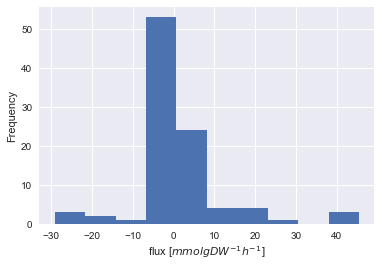

In [84]:
fig = solution.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

Let's filter the non-zero fluxes.

In [85]:
solution.fluxes[solution.fluxes != 0.]

ACONTa                      6.007250e+00
ACONTb                      6.007250e+00
AKGDH                       5.064376e+00
ATPM                        8.390000e+00
ATPS4r                      4.551401e+01
BIOMASS_Ecoli_core_w_GAM    8.739215e-01
CO2t                       -2.280983e+01
CS                          6.007250e+00
CYTBD                       4.359899e+01
ENO                         1.471614e+01
EX_co2_e                    2.280983e+01
EX_glc__D_e                -1.000000e+01
EX_h_e                      1.753087e+01
EX_h2o_e                    2.917583e+01
EX_nh4_e                   -4.765319e+00
EX_o2_e                    -2.179949e+01
EX_pi_e                    -3.214895e+00
FBA                         7.477382e+00
FUM                         5.064376e+00
G6PDH2r                     4.959985e+00
GAPD                        1.602353e+01
GLCpts                      1.000000e+01
GLNS                        2.234617e-01
GLNabc                      2.722410e-16
GLUDy           

## Metabolic pathway visualizations with Escher

It is quite tedious to try to interpret GSM flux predictions by looking at the raw numbers or statistics. One very useful approach to analyzing simulation results is to plot them on metabolic pathway maps. Luckily a very useful Python package exists for that purpose – [Escher](https://escher.github.io/#/) ([10.1371/journal.pcbi.1004321](http://dx.doi.org/10.1371/journal.pcbi.1004321)).

In [86]:
import escher

You can watch the following [video](https://www.youtube.com/embed/qUipX-xzZjQ) to get an overview of Escher's functionality.

In [87]:
from IPython.display import IFrame
IFrame(width="560", height="315", src="https://www.youtube.com/embed/qUipX-xzZjQ")

With the following you can display all available maps in escher (you can also load you're own which we are not going to cover here).

In [88]:
escher.list_available_maps()

[{'organism': 'Saccharomyces cerevisiae',
  'map_name': 'iMM904.Central carbon metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Inositol retinol metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Glycolysis TCA PPP'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Tryptophan metabolism'},
 {'organism': 'Homo sapiens', 'map_name': 'RECON1.Carbohydrate metabolism'},
 {'organism': 'Homo sapiens',
  'map_name': 'RECON1.Amino acid metabolism (partial)'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Nucleotide metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid biosynthesis (saturated)'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Nucleotide and histidine biosynthesis'},
 {'organism': 'Escherichia coli', 'map_name': 'e_coli_core.Core metabolism'},
 {'organism': 'Escherichia coli', 'map_name': 'iJO1366.Central metabolism'},
 {'organism': 'Escherichia coli',
  'map_name': 'iJO1366.Fatty acid beta-oxidation'}

Let's display the map that corresponds to the _E. coli_ core model.

In [89]:
escher.Builder('e_coli_core.Core metabolism')

Builder()

Ok, now to the data visualization part. Escher can visualization gene, reaction, and metabolite-centric  data. Here an example of visualizing one flux and one metabolite concentration (Escher expect Python dictionaries as data input mapping data values to gene/reaction/metabolite identifiers).

In [90]:
escher.Builder('e_coli_core.Core metabolism',
               reaction_data={'PGK': 100},
               metabolite_data={'ATP': 20})

Builder(metabolite_data={'ATP': 20}, reaction_data={'PGK': 100})

***
**A.**

* Visualize the computed fluxes (see above `solution.fluxes`) on the central carbon metabolism map.

Hints:
* You can convert a pandas Series into a dictionary using the `.to_dict()` method.

In [91]:
solution.fluxes[solution.fluxes != 0.]

ACONTa                      6.007250e+00
ACONTb                      6.007250e+00
AKGDH                       5.064376e+00
ATPM                        8.390000e+00
ATPS4r                      4.551401e+01
BIOMASS_Ecoli_core_w_GAM    8.739215e-01
CO2t                       -2.280983e+01
CS                          6.007250e+00
CYTBD                       4.359899e+01
ENO                         1.471614e+01
EX_co2_e                    2.280983e+01
EX_glc__D_e                -1.000000e+01
EX_h_e                      1.753087e+01
EX_h2o_e                    2.917583e+01
EX_nh4_e                   -4.765319e+00
EX_o2_e                    -2.179949e+01
EX_pi_e                    -3.214895e+00
FBA                         7.477382e+00
FUM                         5.064376e+00
G6PDH2r                     4.959985e+00
GAPD                        1.602353e+01
GLCpts                      1.000000e+01
GLNS                        2.234617e-01
GLNabc                      2.722410e-16
GLUDy           

In [92]:
escher.Builder('e_coli_core.Core metabolism',
               reaction_data=solution.fluxes.to_dict())

Builder(reaction_data={'ACALD': 0.0, 'ACALDt': 0.0, 'ACKr': 0.0, 'ACONTa': 6.007249575350342, 'ACONTb': 6.0072…

## Manipulating models

### Making temporary changes to the model

Usually one relies on making copies if objects need to be changed but the original state needs to be retained. Unfortunately, making copies of models is time consuming.

In [93]:
model.optimize()

,fluxes,reduced_costs
ACALD,0.000000,6.938894e-18
ACALDt,0.000000,0.000000e+00
ACKr,0.000000,1.040834e-17
ACONTa,6.007250,0.000000e+00
ACONTb,6.007250,1.387779e-17
...,...,...
TALA,1.496984,-1.387779e-17
THD2,0.000000,-2.546243e-03
TKT1,1.496984,-1.387779e-17
TKT2,1.181498,1.387779e-17


In [94]:
%%time
copy_of_model = model.copy()

Wall time: 36.9 ms


Yes, even milliseconds add up pretty quickly if you need to run many simulations (e.g. if you need to knock out every single gene individually in the model to check if it is essential or not).

In [95]:
%%time
for gene in model.genes:
    mutant = model.copy()
    mutant.genes.get_by_id(gene.id).knock_out()

Wall time: 4.17 s


For that reason cobrapy provides a mechanism that is less time consuming. Almost all methods that make changes to the mdoel such as knocking-out genes, reactions, adding or removing metabolites, reactions etc can be automatically reverted upon exit from a python context. How this works is probably best understood by looking at an example.

In [96]:
%%time
with model:
    for gene in model.genes:
        gene.knock_out()

Wall time: 13 ms


Here, the `with model` statements starts the context and changes done to the model one indentation level to the right, are automatically recorded. When that block finishes, the context manager is requested to roll-back all changes leaving the model looking exactly as it did before all the changes.

Changing flux bounds can as indicated also be done reversibly. For example let's set the lower and upper bound of phosphoglycerate kinase to 0 (effectively knocking out the reaction).

In [97]:
with model:
    model.reactions.PGK.bounds = 0, 0
    print("PGK's bounds inside the with statement")
    print(model.reactions.PGK.lower_bound, model.reactions.PGK.bounds)
    print('Mutant growth rate: ', model.optimize().objective_value)
print("PGK's bounds outside the with statement")
print(model.reactions.PGK.bounds)

PGK's bounds inside the with statement
0 (0, 0)
Mutant growth rate:  -2.171174082614637e-15
PGK's bounds outside the with statement
(-1000.0, 1000.0)


### Slim versus full optimize

Mathematical solvers are now so fast that for many small to mid-size models computing the solution can be even faster than it takes us to collect the values from the solver and convert that to objects that are usable for in python. When we use `model.optimize` we gather values for all reactions and metabolites and that can take some time. If we are only interested in the flux value of a single reaction or the objective, it is faster to instead use `model.slim_optimize` which only does the optimization and returns the objective value leaving it up to you to fetch other values that you may need. For example, let's optimize and get the flux value of the `ATPM` reaction.

In [98]:
%%time
solution = model.optimize()
solution.fluxes['ATPM']

Wall time: 1.99 ms


8.39

In [99]:
%%time
model.slim_optimize()
model.reactions.ATPM.flux

Wall time: 0 ns


8.39

Again, the difference may seem small but when done thousands of times these small differences can start to become significant.

### Changing the objective function

You can change the objective function like this (e.g. if you'd like to determine the maximum possible production rate of acetate).

In [100]:
with model:
    model.objective = model.reactions.EX_ac_e
    print(model.optimize().objective_value)

20.0


### Changing the medium

One can access the medium condition using `model.medium`. The indicated bound is the effective upper uptake bound. 

In [101]:
model.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

Changing the carbon source in the medium can be achieved by adjusting the flux bounds of the respective exchange reactions appropriately. For example, the following code block removes glucose from the medium and adds succinate.

In [102]:
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0
    medium['EX_succ_e'] = 10
    model.medium = medium
    solution = model.optimize()
    print(solution.fluxes['BIOMASS_Ecoli_core_w_GAM'])

0.397563015427763


Changing the carbon source to succinate led to a significant drop in growth rate.

***
**B.**

* Change the carbon source in the medium to a different carbon source. What is the difference in the growth rate observed?
* How about growing E. coli under anaerobic conditions?
* Now that you know how to compute the maximum production rate of a compound and you know how to manipulate the medium, calculate the theoretical maximum yield of succinate.

Hints:
* Remember that you can use model.reactions.query to find specific metabolites and reactions etc.
* You can use `model.exchanges` to get an overview of available exchange reactions

In [103]:
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 0
    medium['EX_ac_e'] = 10
    model.medium = medium
    model.objective = model.reactions.EX_succ_e
    succ_production = model.optimize().objective_value
    print("Max. succinate production [mmol gDW^-1 h^-1]:", succ_production)
    print("Theoretical max. yield [mmol-succ / mmol-ac]:", succ_production / (-1*model.reactions.EX_ac_e.flux))

Max. succinate production [mmol gDW^-1 h^-1]: 3.4110000000000364
Theoretical max. yield [mmol-succ / mmol-ac]: 0.3411000000000036


## Adding reactions and pathways

In [104]:
from cobra import Reaction, Metabolite

Ok, let's add [cis-aconitic acid decarboxylase](https://www.kegg.jp/entry/R02243), a reaction that produces itaconic acid from the TCA cycle intertmediate cis-aconitate:

    1 H(+) + 1 cis-aconitate = 1 CO2 + 1 itaconate

In [105]:
new_reaction = Reaction('CAADC')  # CAADC -> (c)is-(a)conitic (a)cid (d)e(c)arboxylase

Itaconic acid (or itaconate depending on its protonation state) is not a native metabolite in _E. coli_. So, we need to create a new metabolite.

In [106]:
itaconate = Metabolite(id='itaconate_c', compartment='c')

The native metabolites in the reaction are:

In [107]:
model.metabolites.acon_C_c

Metabolite identifier,acon_C_c
Name,Cis-Aconitate
Memory address,0x020c37aab400
Formula,C6H3O6
Compartment,c
In 2 reaction(s),"ACONTa, ACONTb"


In [108]:
model.metabolites.h_c

Metabolite identifier,h_c
Name,H+
Memory address,0x020c3929f670
Formula,H
Compartment,c
In 35 reaction(s),"G6PDH2r, PFK, GLNabc, FORt2, PIt2r, THD2, MALS, PPS, GLUSy, ACALD, D_LACt2, CYTBD, GLUt2r, ATPM, ALCD2x, ACt2r, CS, GLUDy, MDH, ETOHt2r, BIOMASS_Ecoli_core_w_GAM, GAPD, PPC, AKGt2r, FUMt2_2, PYK,..."


In [109]:
model.metabolites.co2_c

Metabolite identifier,co2_c
Name,CO2
Memory address,0x020c3a3d8520
Formula,CO2
Compartment,c
In 9 reaction(s),"ICDHyr, GND, AKGDH, ME1, PPCK, PDH, CO2t, PPC, ME2"


Now, we're going to specify the reaction's stoichiometry.

In [110]:
new_reaction.add_metabolites({model.metabolites.h_c: -1,
                              model.metabolites.acon_C_c: -1,
                              itaconate: 1, # our newly created metabolites
                              model.metabolites.co2_c: 1
                             })

Printing the reaction reveals that the reaction reveals that formula is correct.

In [111]:
print(new_reaction.build_reaction_string())

acon_C_c + h_c --> co2_c + itaconate_c


Now, let's add the new reaction to the model.

In [112]:
model.add_reactions([new_reaction])

Quickly check that the reaction was indeed added to the model.

In [113]:
model.reactions.CAADC

Reaction identifier,CAADC
Name,
Memory address,0x020c3a536e20
Stoichiometry,acon_C_c + h_c --> co2_c + itaconate_c Cis-Aconitate + H+ --> CO2 +
GPR,
Lower bound,0.0
Upper bound,1000.0


Let's produce some itaconic acid then!

In [114]:
with model:
    model.objective = model.reactions.CAADC
    print(model.optimize().objective_value)

0.0


***
**C.**


😞 What happened? Discuss with your partners. Why is there no production flux? How can this situation be resolved?

Hints:
* Revisit the steady-steady assumption that underlies also GSMs.

In [115]:
itaconate_exchange = Reaction('EX_itaconate')
itaconate_exchange.add_metabolites({model.metabolites.itaconate_c: -1})
model.add_reaction(itaconate_exchange)

Alternatively, there exists also a convenience function for adding exchange reactions in cobrapy.

In [116]:
model.add_boundary(model.metabolites.itaconate_c, type='demand')

Reaction identifier,DM_itaconate_c
Name,demand
Memory address,0x020c3c5636a0
Stoichiometry,itaconate_c --> -->
GPR,
Lower bound,0
Upper bound,1000.0


In [117]:
with model:
    model.objective = model.reactions.CAADC
    print(model.optimize().objective_value)

10.000000000000467


Yes, much better!

## Phenotype predictions

### Gene deletions and gene essentiality

#### Knocking out a single gene

In the model, exactly one gene is associated with reaction with [phosphoglycerate kinase](http://bigg.ucsd.edu/universal/reactions/PGK) (PGK).

In [118]:
model.reactions.PGK.genes

frozenset({<Gene b2926 at 0x20c392ff760>})

Checking the name of this gene in the model (the id is the Blattner number b2926), reveals that it is indeed [pgk](http://ecocyc.org/gene?orgid=ECOLI&id=EG10703).

In [119]:
model.genes.b2926.name

'pgk'

Is [pgk](http://ecocyc.org/gene?orgid=ECOLI&id=EG10703) essential? Let's find out.

In [120]:
with model as pgk_mutant:
    pgk_mutant.genes.b2926.knock_out()
    print(pgk_mutant.slim_optimize())

2.301861105904079e-16


Yes, it is.

#### Perform all possible single gene deletions

Using a `for` loop allows to iterate over all genes in the model and knock out each one of them individually. We're using the model as a context to undo every gene deletion before proceeding to the next knockout.

In [121]:
essentiality = {}
for gene in model.genes:
    with model:
        gene.knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

In [122]:
essentiality

{<Gene b0351 at 0x20c392ccf40>: 0.8739215069684212,
 <Gene b1241 at 0x20c392ccfd0>: 0.8739215069684212,
 <Gene s0001 at 0x20c392ccaf0>: 0.21114065257210884,
 <Gene b1849 at 0x20c392cc250>: 0.8739215069684305,
 <Gene b3115 at 0x20c392cc790>: 0.8739215069684305,
 <Gene b2296 at 0x20c392cc070>: 0.8739215069684305,
 <Gene b1276 at 0x20c392cc7f0>: 0.8739215069684305,
 <Gene b0118 at 0x20c392cceb0>: 0.8739215069684305,
 <Gene b0474 at 0x20c392cc400>: 0.8739215069684305,
 <Gene b0116 at 0x20c392cc610>: 0.7823510529477404,
 <Gene b0726 at 0x20c392ccc10>: 0.858307408022689,
 <Gene b0727 at 0x20c392cc670>: 0.858307408022689,
 <Gene b2587 at 0x20c392e4220>: 0.8739215069684309,
 <Gene b0356 at 0x20c392e48e0>: 0.8739215069684309,
 <Gene b1478 at 0x20c392e46a0>: 0.8739215069684309,
 <Gene b3731 at 0x20c392e4970>: 0.37422987493311005,
 <Gene b3733 at 0x20c392e4070>: 0.37422987493311005,
 <Gene b3735 at 0x20c392e4460>: 0.37422987493311005,
 <Gene b3739 at 0x20c392e4400>: 0.8739215069684303,
 <Gene b37

In [123]:
df = pd.DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')

<AxesSubplot:ylabel='Frequency'>

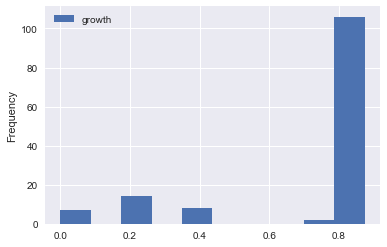

In [124]:
df.plot.hist()

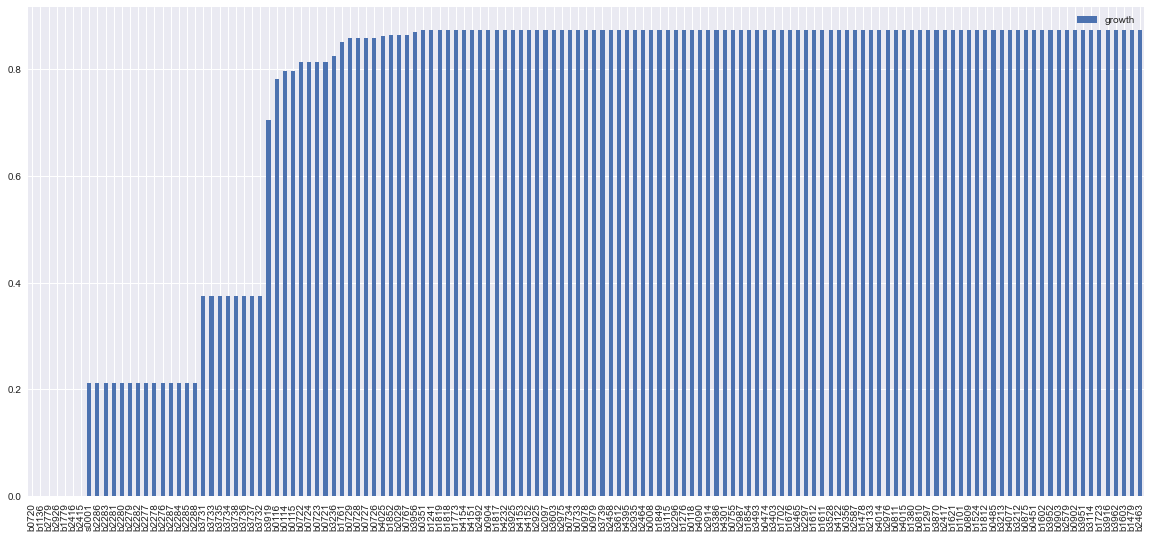

In [125]:
ax = df.plot.bar().axes
ax.figure.set_size_inches(20, 9)

## Phenotypic phase plane analysis

In [126]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope

In [127]:
ppp_succ = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.BIOMASS_Ecoli_core_w_GAM)

In [128]:
ppp_succ

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,0.873922,1.584745e+01,NaN,-10.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.827990,1.580658e+01,NaN,-9.498917
2,EX_glc__D_e,0.0,0.0,NaN,0.782058,1.576115e+01,NaN,-8.997835
3,EX_glc__D_e,0.0,0.0,NaN,0.736127,1.571037e+01,NaN,-8.496752
4,EX_glc__D_e,0.0,0.0,NaN,0.690195,1.565323e+01,NaN,-7.995669
5,EX_glc__D_e,0.0,0.0,NaN,0.644263,1.558844e+01,NaN,-7.494586
6,EX_glc__D_e,0.0,0.0,NaN,0.598332,1.551437e+01,NaN,-6.993504
7,EX_glc__D_e,0.0,0.0,NaN,0.552400,1.542887e+01,NaN,-6.492421
8,EX_glc__D_e,0.0,0.0,NaN,0.506469,1.532906e+01,NaN,-5.991338
9,EX_glc__D_e,0.0,0.0,NaN,0.460537,1.521104e+01,NaN,-5.490256


<AxesSubplot:xlabel='EX_glc__D_e'>

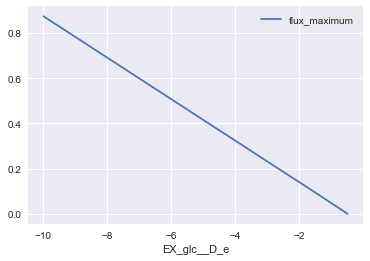

In [129]:
ppp_succ.plot(x='EX_glc__D_e', y='flux_maximum')

***
**D.**

Use `production_envelope` to determine the optimal O2 uptake rate.
***

In [130]:
ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.BIOMASS_Ecoli_core_w_GAM)

In [131]:
ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

-22.10526315789474

<AxesSubplot:xlabel='EX_o2_e'>

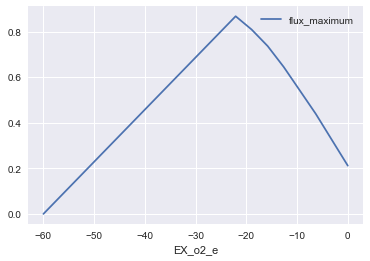

In [132]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum')